In [22]:
# Preliminaries

import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
% matplotlib inline

In [6]:
# Create variables for path
train_path = 'data/train/'
valid_path = 'data/valid'

In [14]:
# Create batches
# Strongly consider setting up an alias for ImageDataGenerator with better presets
train_batch = ImageDataGenerator().flow_from_directory(train_path, target_size = (1024, 1024), classes = ['areolata', 'helicta', 'francisii', 'mitchellii'], batch_size = 8)
valid_batch = ImageDataGenerator().flow_from_directory(valid_path, target_size = (1024, 1024), classes = ['areolata', 'helicta', 'francisii', 'mitchellii'], batch_size = 2)

Found 417 images belonging to 4 classes.
Found 63 images belonging to 4 classes.


In [17]:
imgs, labels = next(train_batch)n # randomly select 10 images

In [18]:
# plots 10 images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

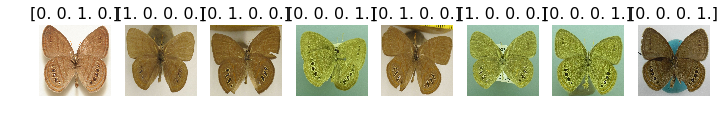

In [19]:
plots(imgs, titles=labels)

In [34]:
# Now to model
model = Sequential([
        Conv2D(32, (64, 64), activation='relu', input_shape = (1024, 1024, 3)),
        Flatten(),
        Dense(4, activation='softmax'),
    ])

In [35]:
model.compile(Adam(lr = .0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 961, 961, 32)      393248    
_________________________________________________________________
flatten_4 (Flatten)          (None, 29552672)          0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 118210692 
Total params: 118,603,940
Trainable params: 118,603,940
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(train_batch, steps_per_epoch = 4, 
                    validation_data = valid_batch, validation_steps = 4, epochs = 5, verbose = 2)

Epoch 1/5
